In [22]:
import numpy as np
import matplotlib.pyplot as pyp

class parameters:
    def __init__(self):
        self.x_resolution = 1500
        self.y_resolution = 1000
        self.center_x = -0.75
        self.center_y = 0.0
        self.x_width = 1.5
        self.y_height = 1.0
        self.iterations = 100

class complex_num:
    def __init__(self, r, i):
        self.real = r
        self.imag = i
        
    def add(self, real_add, imag_add):
        self.real += real_add
        self.imag += imag_add
        
    def square(self):
        real_tmp = self.real
        imag_tmp = self.imag
        self.real = real_tmp**2 - imag_tmp**2
        self.imag = 2.0 * real_tmp * imag_tmp
        



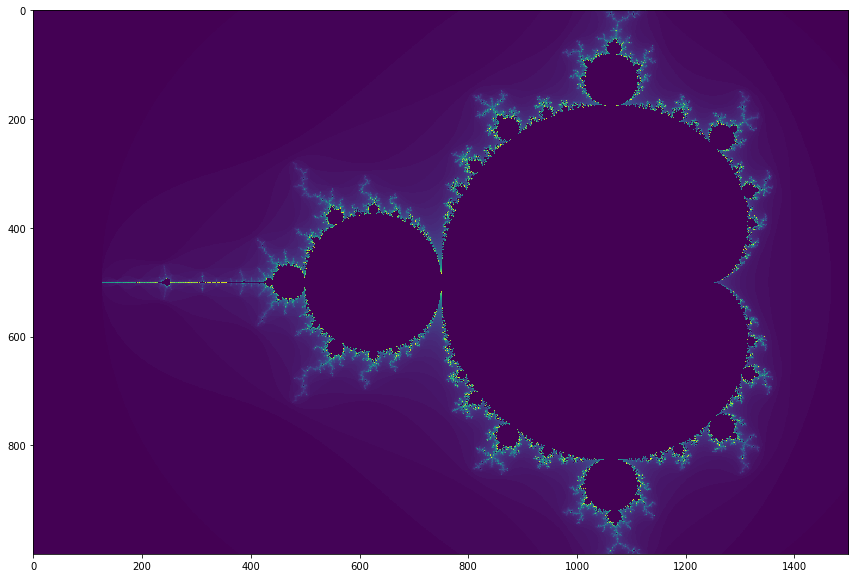

In [25]:
def init_grid(p):
    grid = np.zeros([p.y_resolution, p.x_resolution])
    x_scale = np.arange(-p.x_width + p.center_x, p.x_width + p.center_x, 2.0 * p.x_width / p.x_resolution)
    y_scale = np.arange(-p.y_height + p.center_y, p.y_height + p.center_y, 2.0 * p.y_height / p.y_resolution)
    
    return grid, x_scale, y_scale

def test_divergence(z, c, params): 
    real_constant = c.real
    imag_constant = c.imag
    
    for iteration in range(0, params.iterations):
        z.square()
        z.add(real_constant, imag_constant)
    
        if((z.real**2 + z.imag**2) > 4.0):
            break
    
    return iteration

def calculate_grid(grid, x_scale, y_scale, params):

    for x_index in range(params.x_resolution):
        for y_index in range(params.y_resolution):
            test_point = complex_num(x_scale[x_index], y_scale[y_index])
            iteration = test_divergence(test_point, test_point, params)

            if (iteration == params.iterations - 1):
                value = 0
            else:
                value = iteration
                
            grid[y_index][x_index] = value
    

    return grid


params = parameters()
grid, x_scale, y_scale = init_grid(params)
grid = calculate_grid(grid, x_scale, y_scale, params)

pyp.figure(figsize = (15, 10))
pyp.imshow(grid)

